# Summary Evaluation over different experimental hyperparameter combinaitons

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# remove waringns
import warnings
warnings.filterwarnings("ignore")

from utils_evaluation import barplot_coloured_by_parameter

KeyboardInterrupt: 

## Load Data

In [ ]:
import pandas as pd
# load csv
df = pd.read_csv('/Users/nadja/Documents/University/Master_Statistik/WS2023_24/SLDS/slds_stratification/Simulations/Final_Setup/Evaluation/tables/rf/results_per_parameter.csv')

experimental_parameters = ['param_model', 'param_transformation',  'param_n_train', 'param_group_size', 'param_noise']

# split parameter_combination_string into separate columns
for i, param in enumerate(experimental_parameters):
    df[param] = df['parameter_combination_string'].str.split('_').str[i]
    
# convert numeric columns to integer type
numeric_columns = ['param_n_train', 'param_group_size', 'param_noise']
df[numeric_columns] = df[numeric_columns].astype(int)

df.head()

,parameter_combination_string,num_exp,hyperparameter_different,hyperparameter_same,hyperparameter_different_rel,val_train_descriptives_ks_statistic_mean_stratified,val_train_descriptives_ks_statistic_sd_stratified,val_train_descriptives_ks_statistic_mean_unstratified,val_train_descriptives_ks_statistic_sd_unstratified,val_train_descriptives_ks_statistic_mean_diff,...,error_estimatorerror_estimate_mean_diff,num_unique_stratified,counts_stratified,num_unique_unstratified,counts_unstratifed,param_model,param_transformation,param_n_train,param_group_size,param_noise
0,rf_identity_200_5_0,120,66,54,0.550000,0.025000,5.574390e-17,0.147635,0.023009,-0.122635,...,0.066104,[0 1 2 3 4 5],[ 1 19 47 26 19 8],[0 1 2 3 4],[16 40 35 20 9],rf,identity,200,5,0
1,rf_identity_200_5_3,120,103,17,0.858333,0.025000,5.574390e-17,0.143542,0.021807,-0.118542,...,0.081301,[0 1 2 3 4 5],[13 36 35 18 11 7],[0 1 2 3 4 5],[10 32 36 19 15 8],rf,identity,200,5,3
2,rf_identity_200_10_0,120,84,36,0.700000,0.047115,1.690276e-03,0.148542,0.025529,-0.101427,...,0.073234,[0 1 2 3 4 5],[ 1 11 42 34 22 10],[0 1 2 3 4],[13 36 41 18 12],rf,identity,200,10,0
3,rf_identity_200_10_3,120,104,16,0.866667,0.047031,1.715464e-03,0.150521,0.020387,-0.103490,...,0.152685,[0 1 2 3 4 5],[11 33 37 18 14 7],[0 1 2 3 4 5],[12 41 31 13 13 10],rf,identity,200,10,3
4,rf_identity_1000_5_0,120,83,37,0.691667,0.005000,3.483994e-18,0.067702,0.011139,-0.062702,...,0.015075,[0 1 2 3 4],[ 1 67 39 12 1],[0 1 2 3 4 5],[ 1 60 40 17 1 1],rf,identity,1000,5,0


## Ceck data

In [ ]:
# Number of experiments per unique experimental parameter combination
df['num_exp'].unique()

array([120])

In [ ]:
# count frequency of experimental_parameters
for param in experimental_parameters:
    print(df[param].value_counts())
    print('')

param_model
rf    24
Name: count, dtype: int64

param_transformation
identity    8
log         8
sqrt        8
Name: count, dtype: int64

param_n_train
200     12
1000    12
Name: count, dtype: int64

param_group_size
5     12
10    12
Name: count, dtype: int64

param_noise
0    12
3    12
Name: count, dtype: int64



In [ ]:
print('Shape of df:', df.shape, '\n')
print('Column names:', df.columns, '\n')
print('Number of duplicates:', df.duplicated().sum(),'\n')

Shape of df: (24, 39) 

Column names: Index(['parameter_combination_string', 'num_exp', 'hyperparameter_different',
       'hyperparameter_same', 'hyperparameter_different_rel',
       'val_train_descriptives_ks_statistic_mean_stratified',
       'val_train_descriptives_ks_statistic_sd_stratified',
       'val_train_descriptives_ks_statistic_mean_unstratified',
       'val_train_descriptives_ks_statistic_sd_unstratified',
       'val_train_descriptives_ks_statistic_mean_diff',
       'val_train_descriptives_p_value_mean_stratified',
       'val_train_descriptives_p_value_sd_stratified',
       'val_train_descriptives_p_value_mean_unstratified',
       'val_train_descriptives_p_value_sd_unstratified',
       'val_train_descriptives_p_value_mean_diff',
       'val_train_descriptives_intersection_area_mean_stratified',
       'val_train_descriptives_intersection_area_sd_stratified',
       'val_train_descriptives_intersection_area_mean_unstratified',
       'val_train_descriptives_interse

## hyperparameter_different_rel

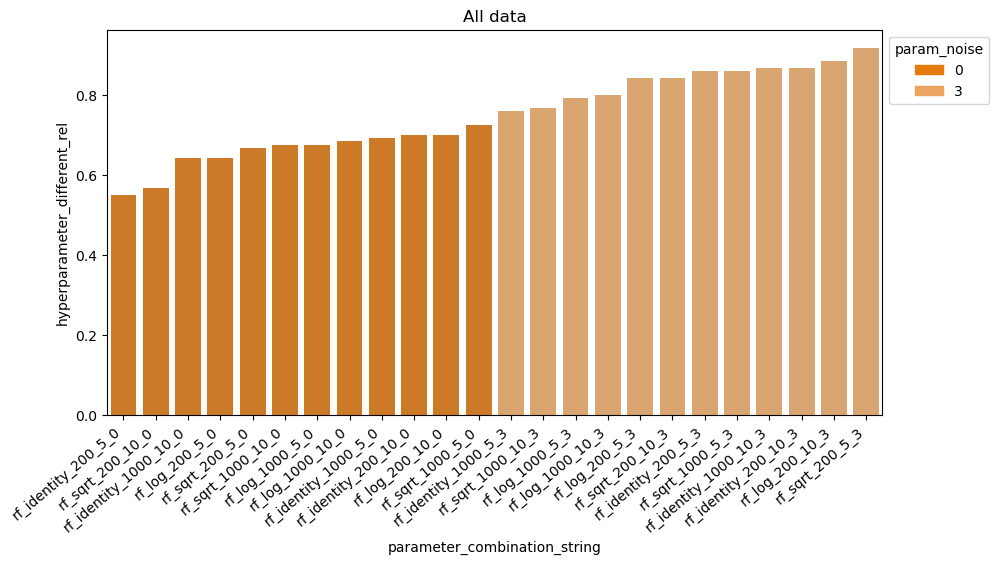

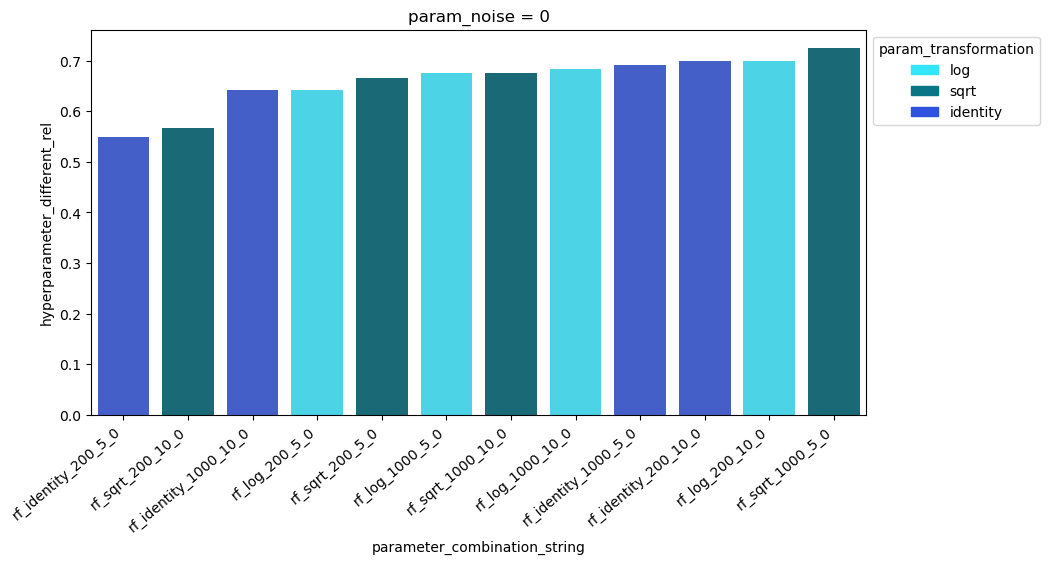

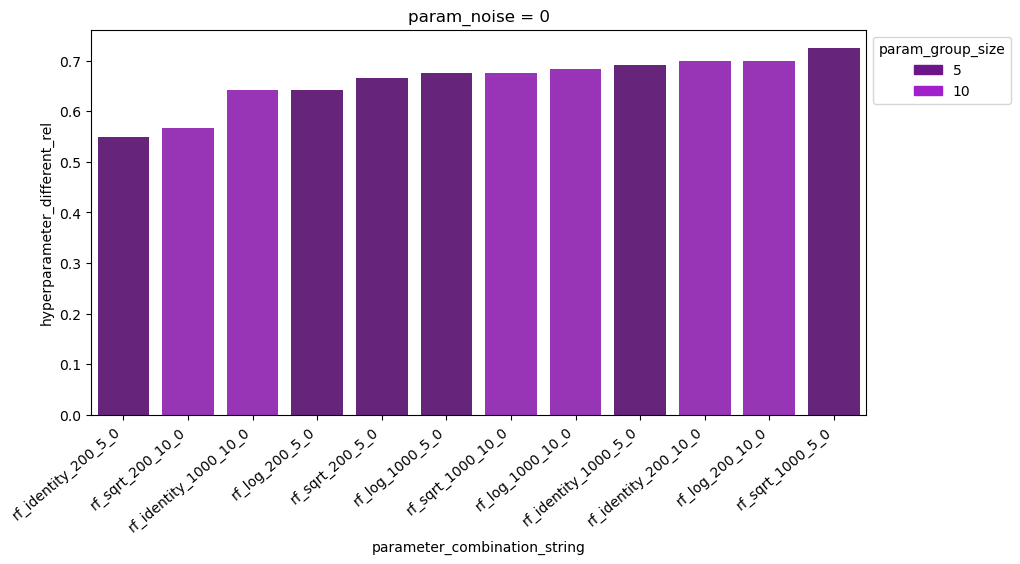

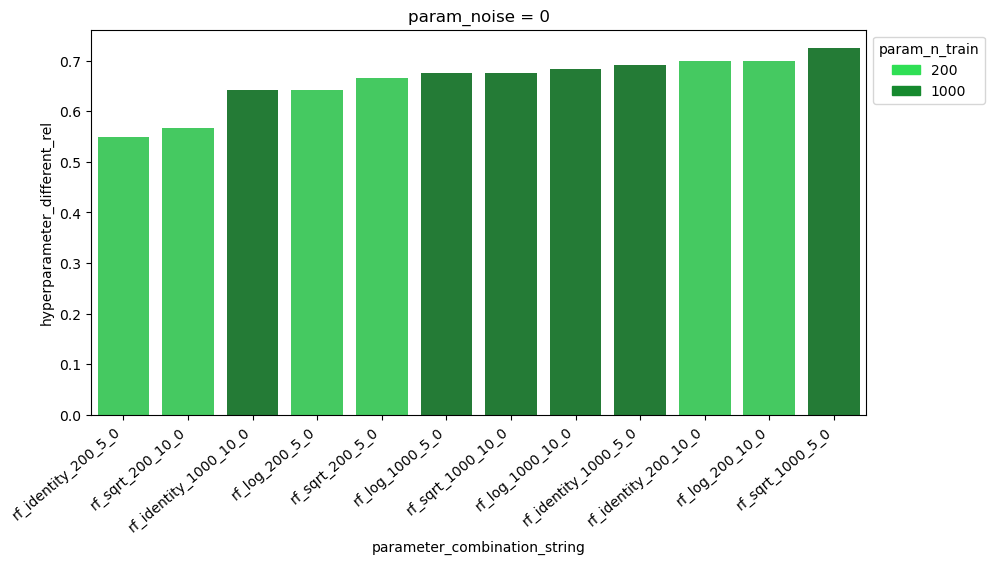

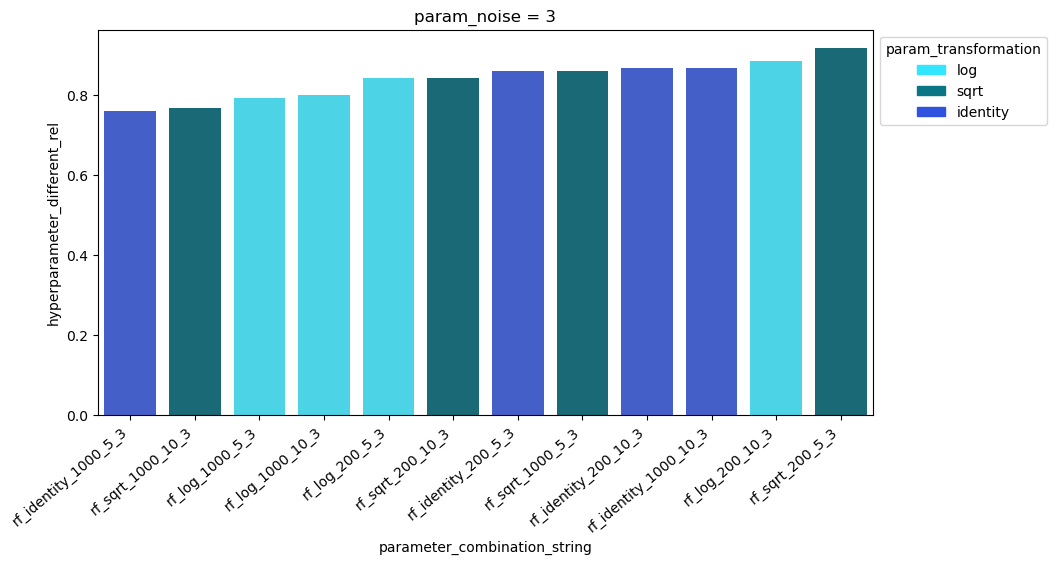

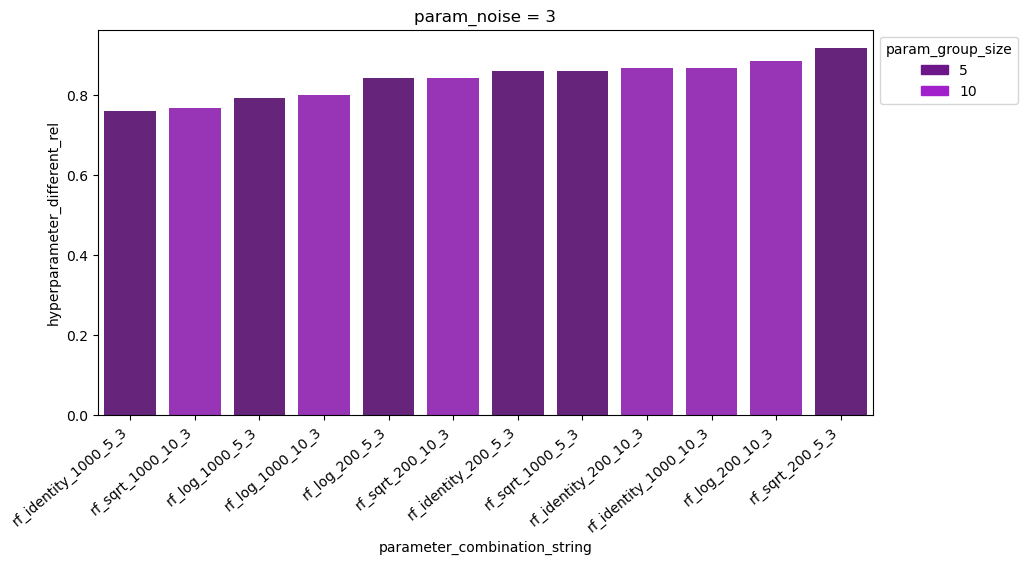

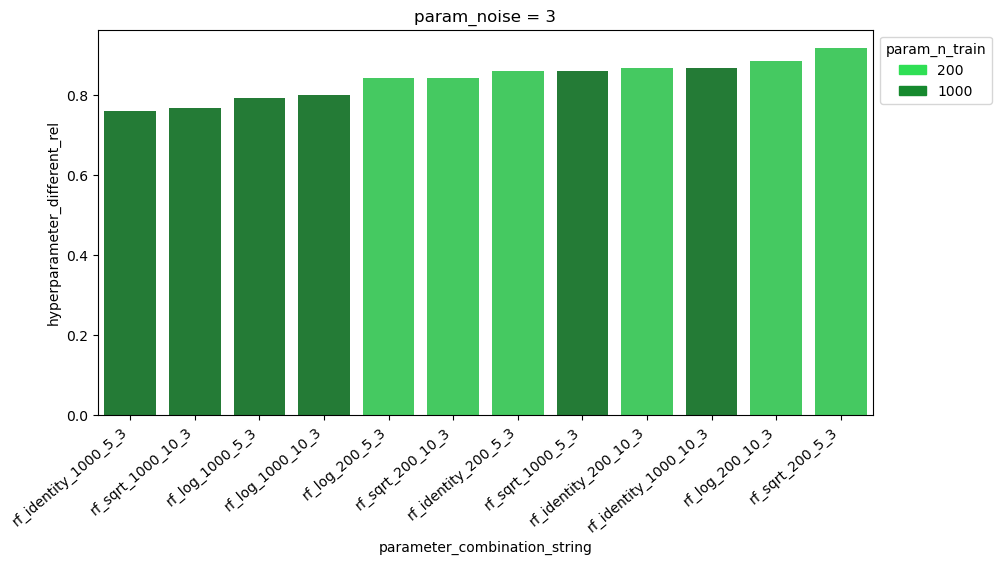

In [ ]:
barplot_coloured_by_parameter(data = df, experimental_parameter = 'param_noise', variable_y = 'hyperparameter_different_rel', title = 'All data')
experimental_parameters = ['param_transformation', 'param_group_size', 'param_n_train']

df_noise_0 = df[df['param_noise'] == 0]
for experimental_parameter in experimental_parameters:
   barplot_coloured_by_parameter(data = df_noise_0, experimental_parameter = experimental_parameter, variable_y = 'hyperparameter_different_rel',  title = 'param_noise = 0')

df_noise_3 = df[df['param_noise'] == 3]
for experimental_parameter in experimental_parameters:
   barplot_coloured_by_parameter(data = df_noise_3, experimental_parameter = experimental_parameter, variable_y = 'hyperparameter_different_rel',  title = 'param_noise = 3')


## val_train_descriptives_intersection_area_mean_diff

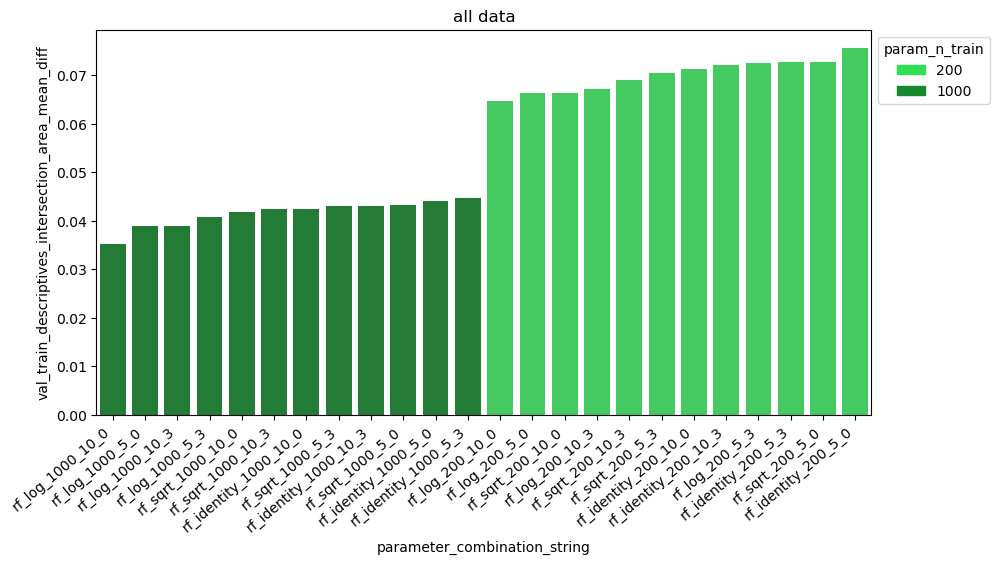

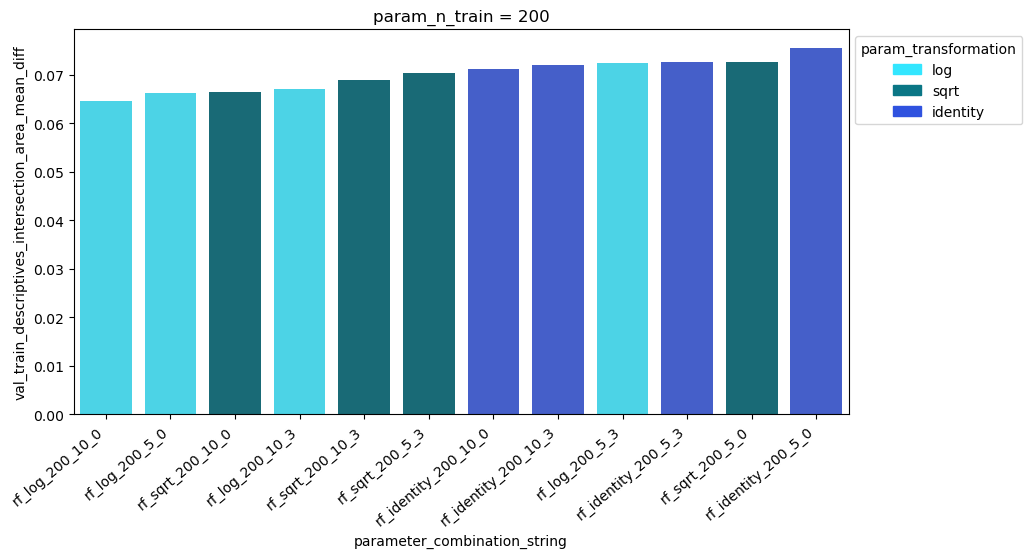

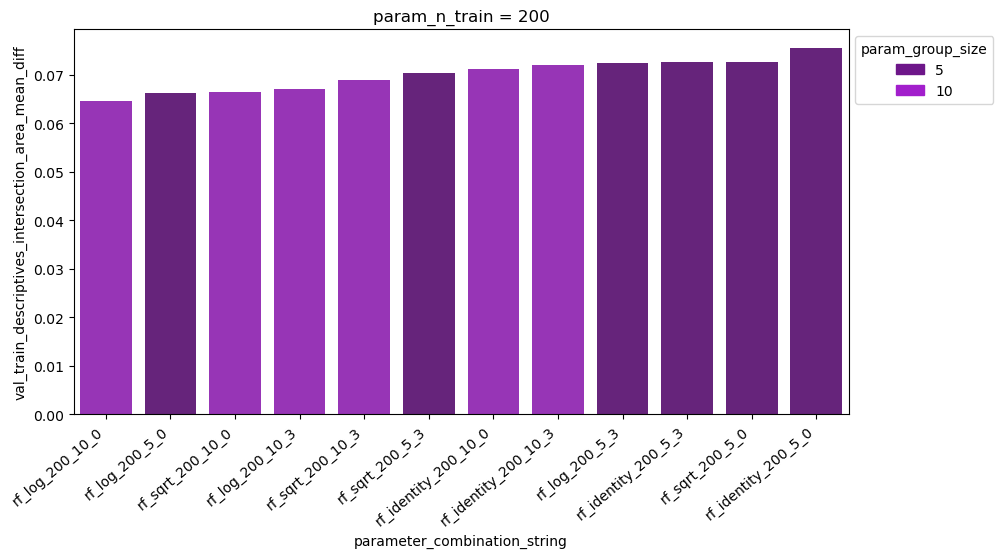

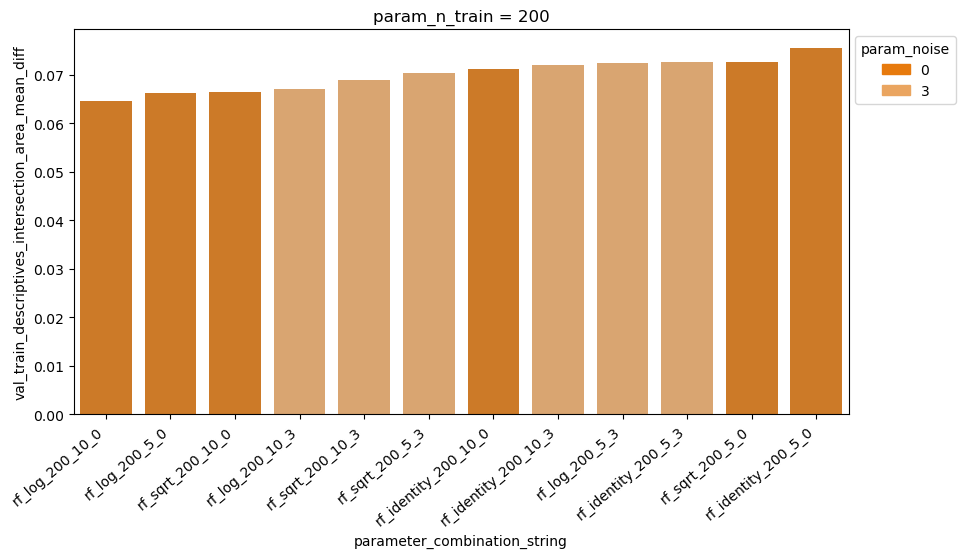

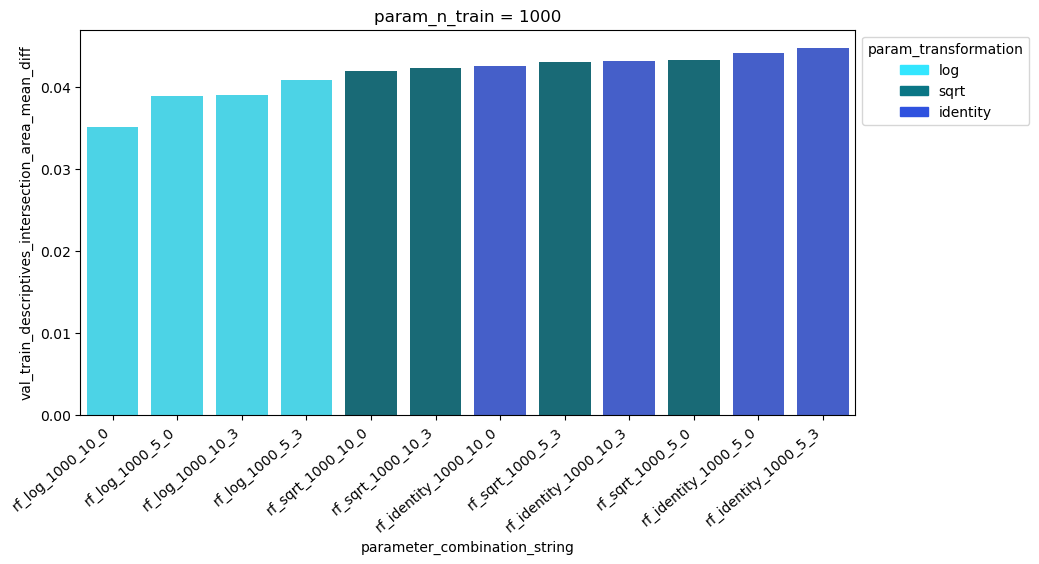

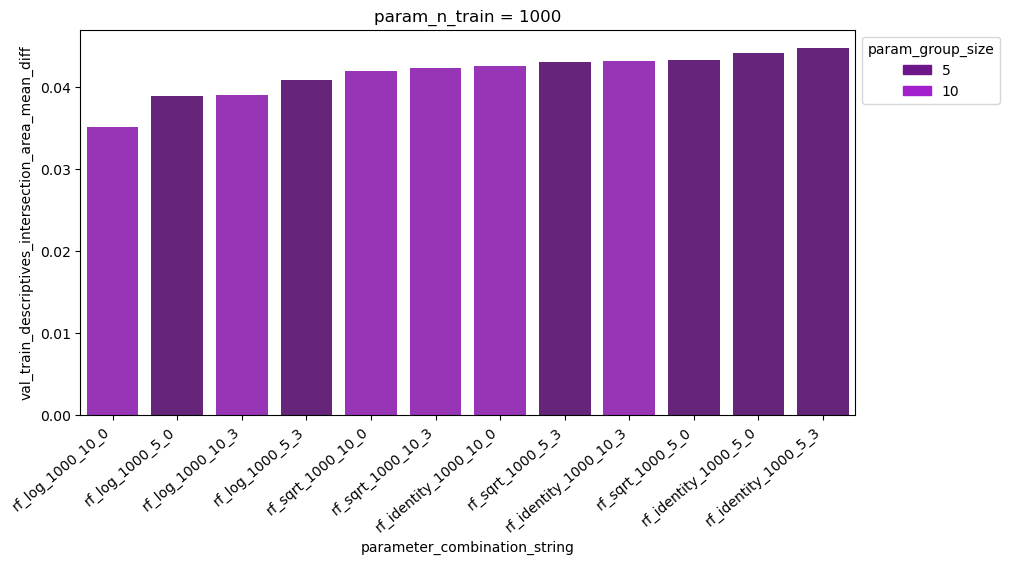

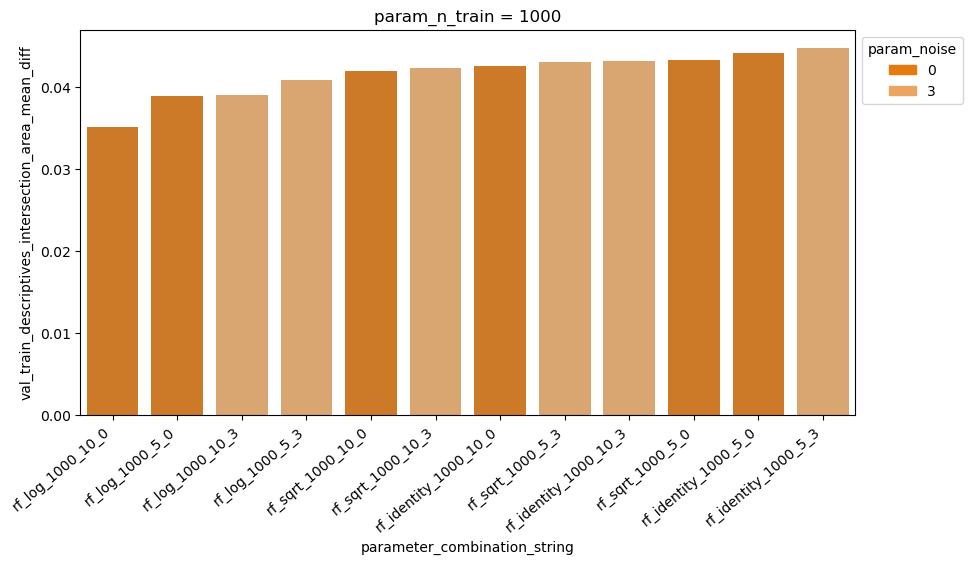

In [ ]:
barplot_coloured_by_parameter(data = df, experimental_parameter = 'param_n_train', variable_y = 'val_train_descriptives_intersection_area_mean_diff', title = 'all data')
experimental_parameters = ['param_transformation', 'param_group_size', 'param_noise']

df_noise_200 = df[df['param_n_train'] == 200]
for experimental_parameter in experimental_parameters:
   barplot_coloured_by_parameter(data = df_noise_200, experimental_parameter = experimental_parameter, variable_y = 'val_train_descriptives_intersection_area_mean_diff', title = 'param_n_train = 200')

df_noise_1000 = df[df['param_n_train'] == 1000]
for experimental_parameter in experimental_parameters:
   barplot_coloured_by_parameter(data = df_noise_1000, experimental_parameter = experimental_parameter, variable_y = 'val_train_descriptives_intersection_area_mean_diff', title = 'param_n_train = 1000')


## RandomSearch_Mean_Val_MSE_diff

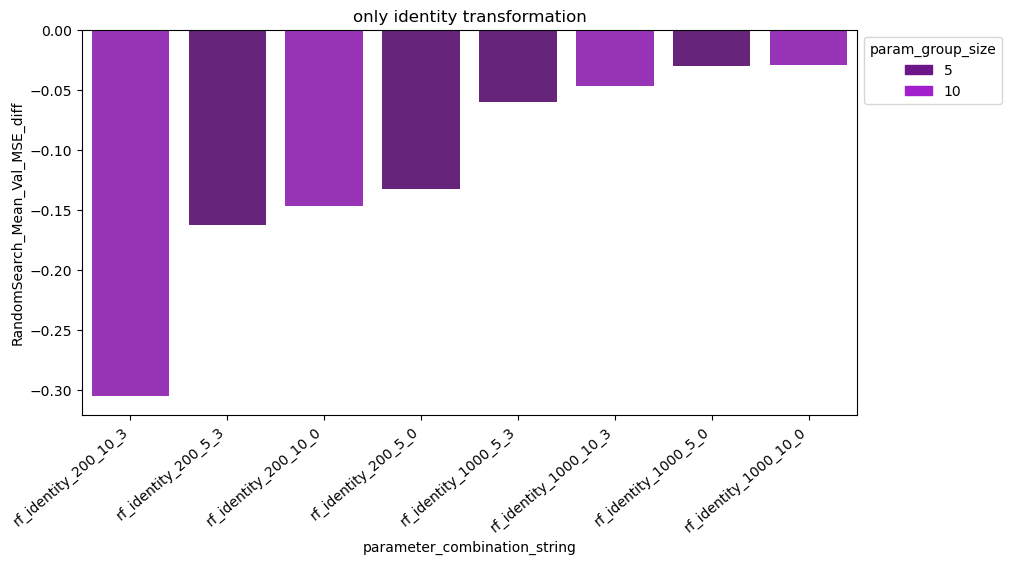

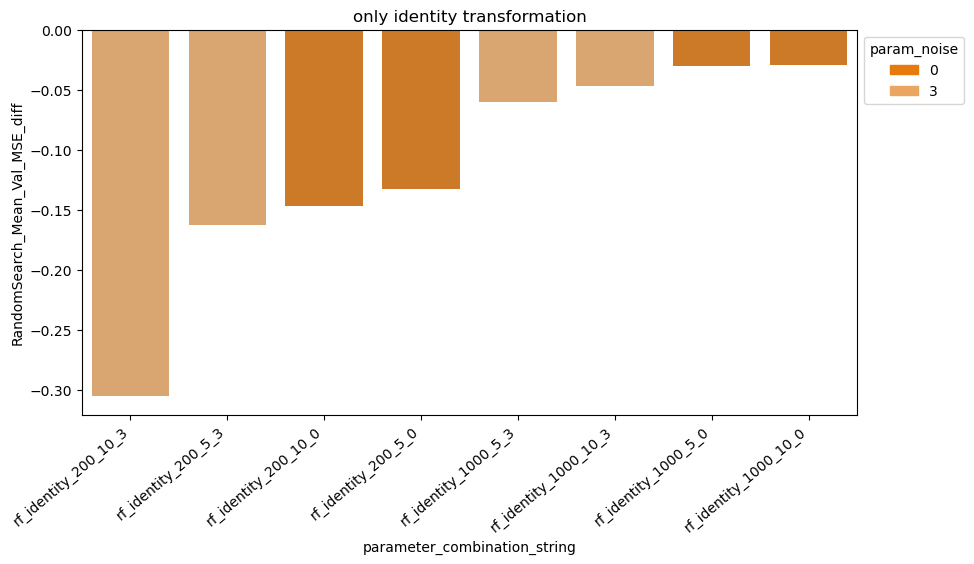

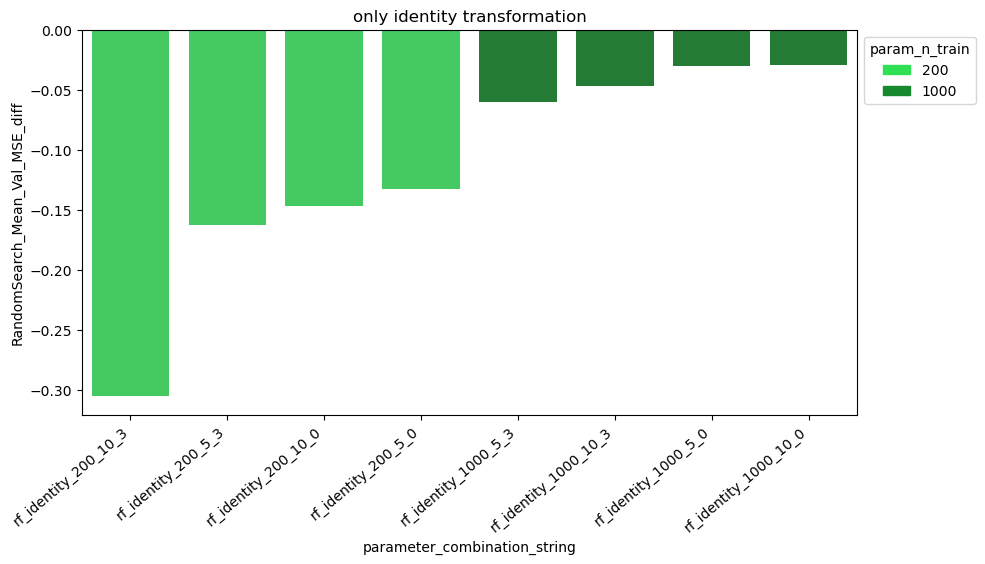

In [ ]:
experimental_parameters = ['param_group_size', 'param_noise', 'param_n_train']
df_noise_identity= df[df['param_transformation'] == 'identity']

for experimental_parameter in experimental_parameters:
   barplot_coloured_by_parameter(data = df_noise_identity, experimental_parameter = experimental_parameter, variable_y = 'RandomSearch_Mean_Val_MSE_diff', title = 'only identity transformation')


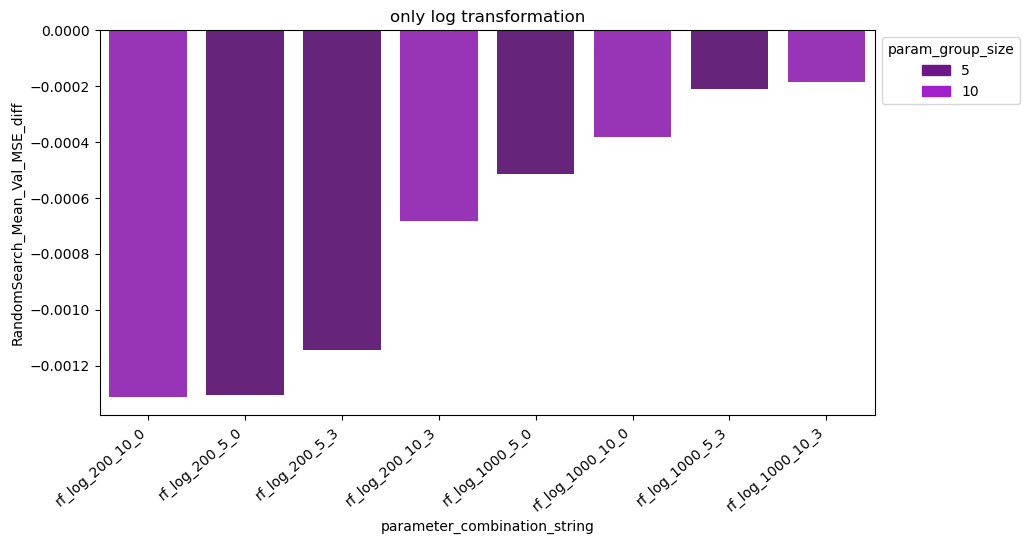

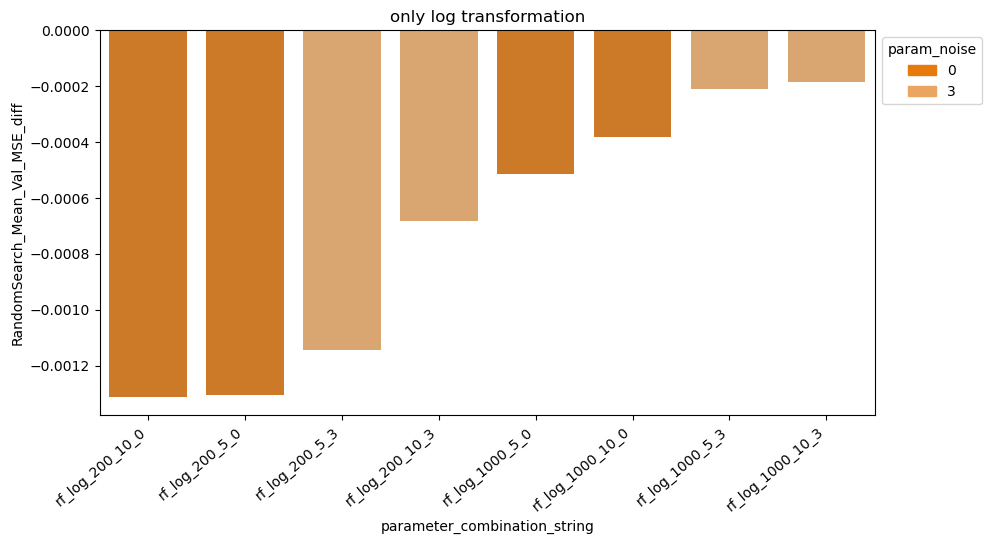

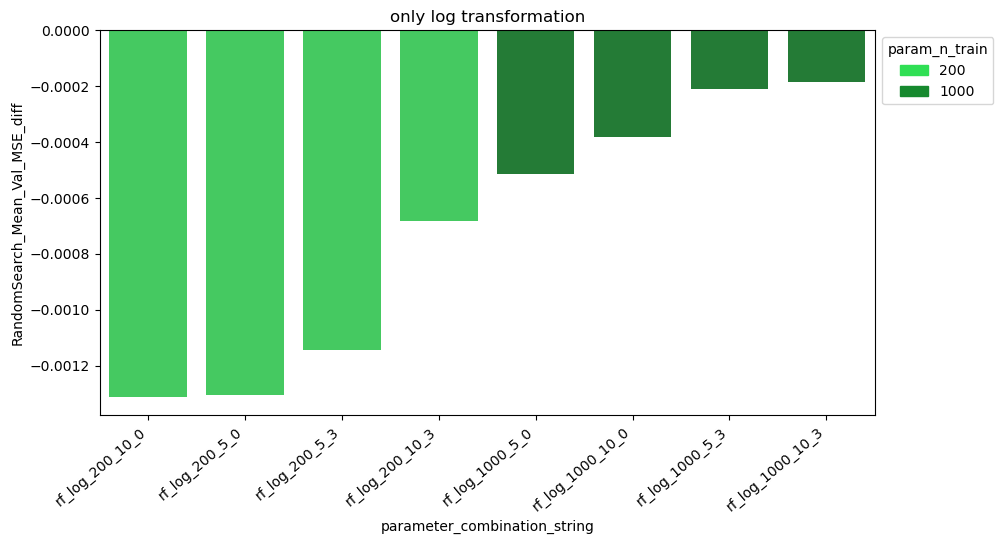

In [ ]:
experimental_parameters = ['param_group_size', 'param_noise', 'param_n_train']
df_noise_identity= df[df['param_transformation'] == 'log']

for experimental_parameter in experimental_parameters:
   barplot_coloured_by_parameter(data = df_noise_identity, experimental_parameter = experimental_parameter, variable_y = 'RandomSearch_Mean_Val_MSE_diff', title = 'only log transformation')


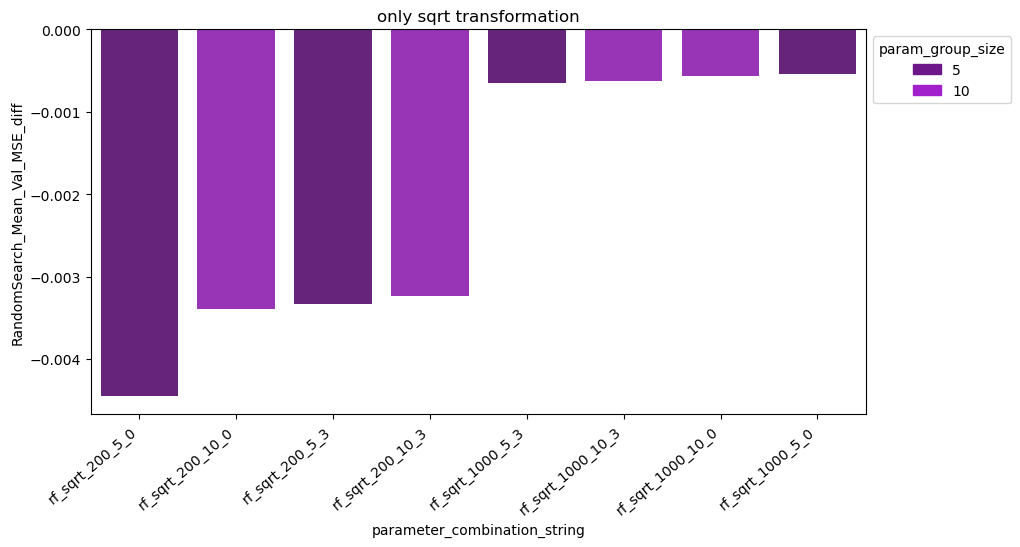

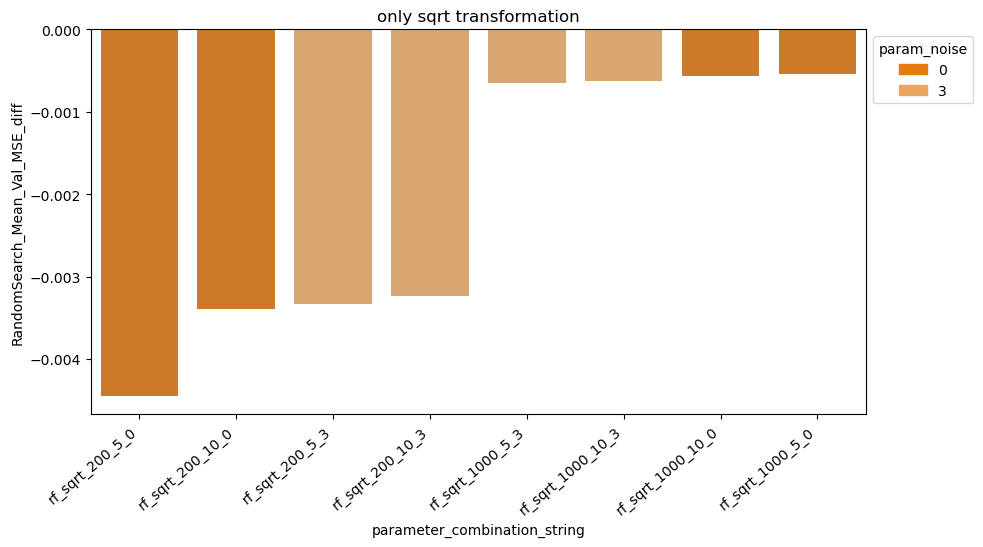

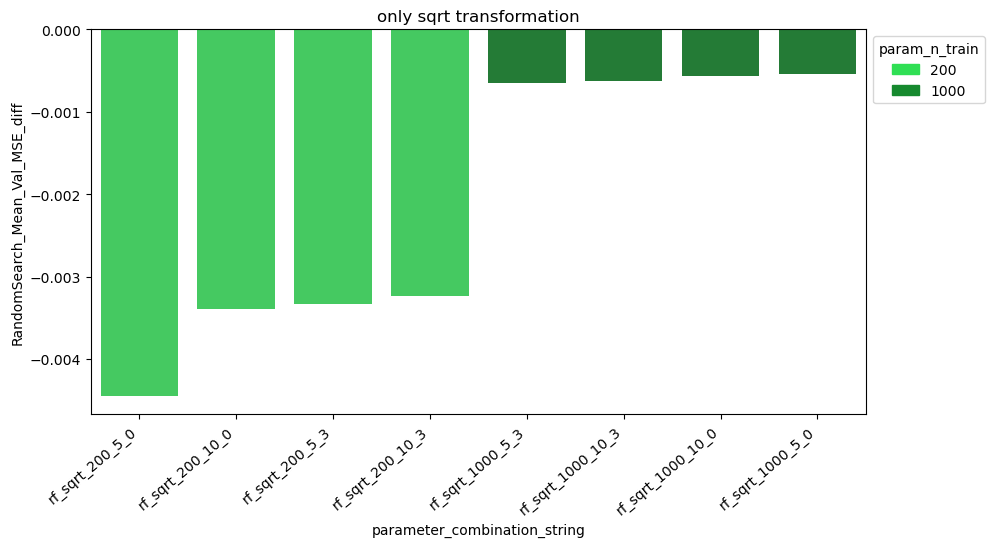

In [ ]:
experimental_parameters = ['param_group_size', 'param_noise', 'param_n_train']
df_noise_identity= df[df['param_transformation'] == 'sqrt']

for experimental_parameter in experimental_parameters:
   barplot_coloured_by_parameter(data = df_noise_identity, experimental_parameter = experimental_parameter, variable_y = 'RandomSearch_Mean_Val_MSE_diff', title = 'only sqrt transformation')


## erro_estimator_mean_diff

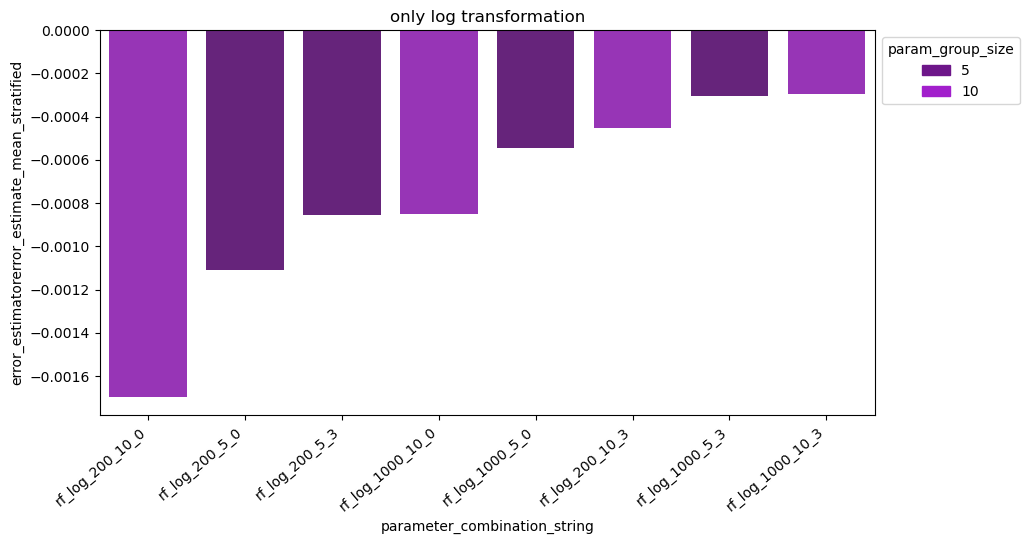

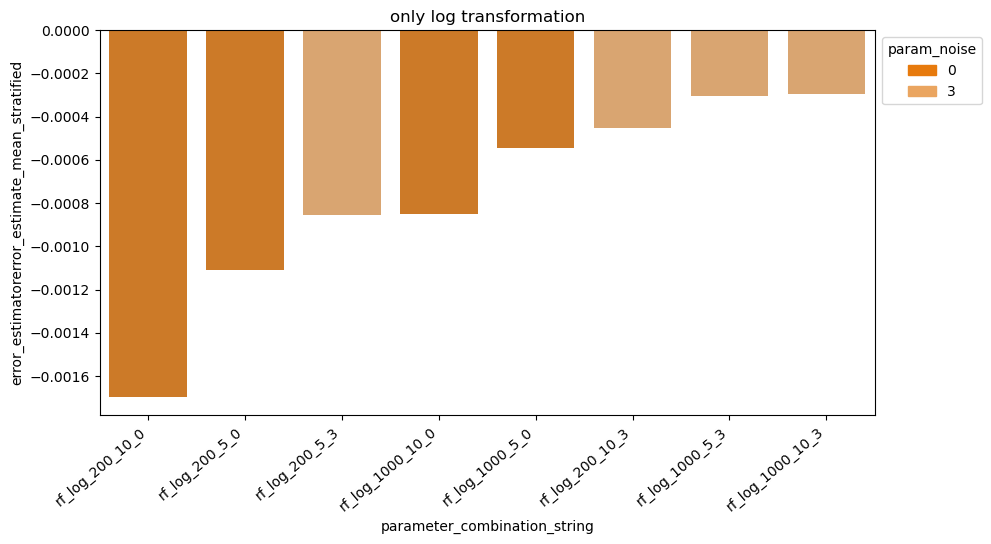

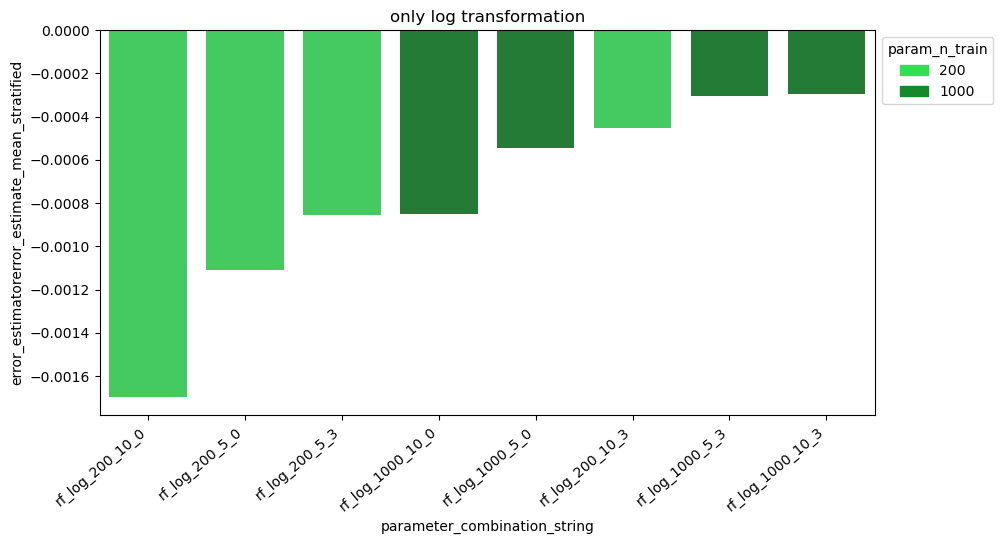

In [ ]:
experimental_parameters = ['param_group_size', 'param_noise', 'param_n_train']
df_transfromation= df[df['param_transformation'] == 'log']

for experimental_parameter in experimental_parameters:
   barplot_coloured_by_parameter(data = df_transfromation, experimental_parameter = experimental_parameter, variable_y = 'error_estimatorerror_estimator_mean_diff', title = 'only log transformation')

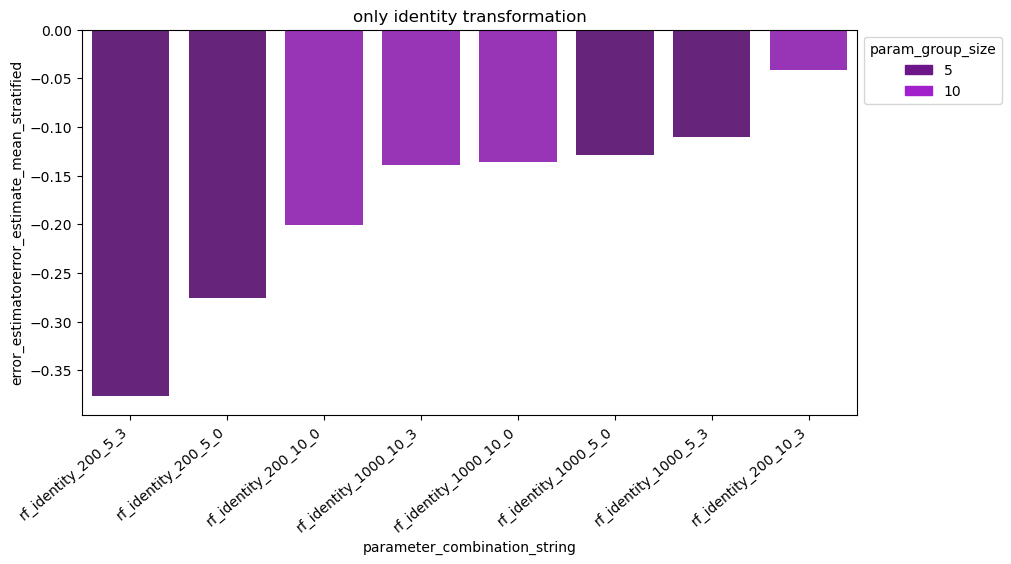

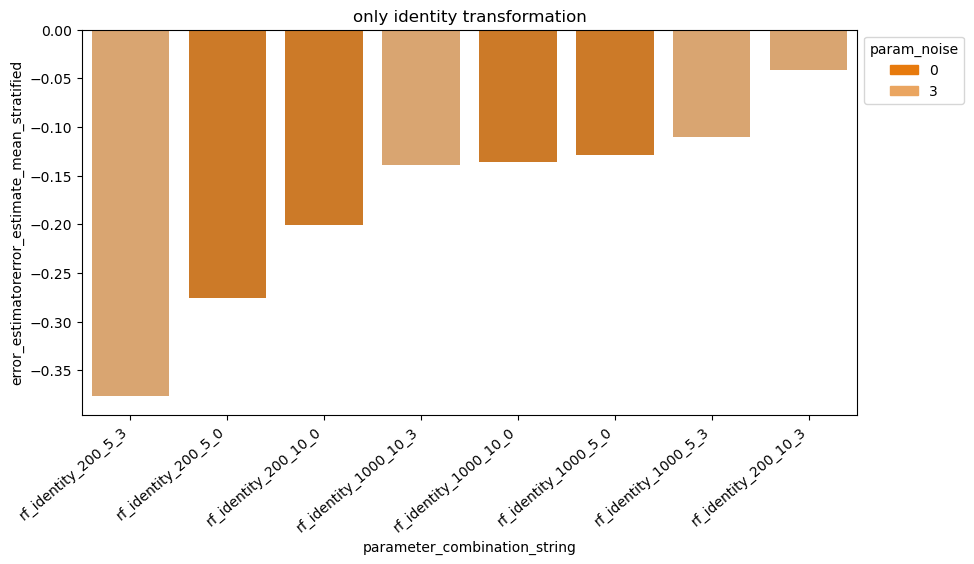

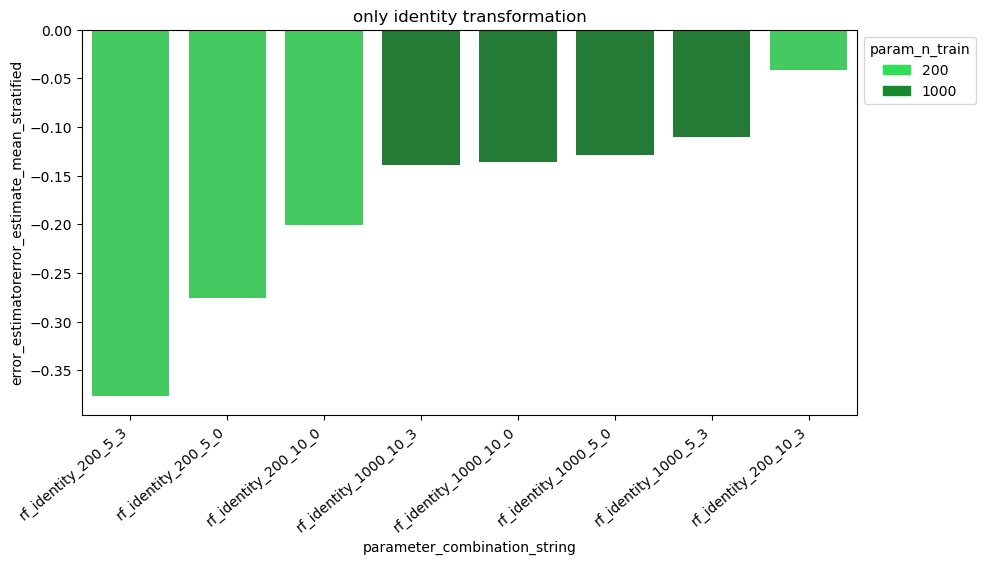

In [ ]:
experimental_parameters = ['param_group_size', 'param_noise', 'param_n_train']
df_transfromation= df[df['param_transformation'] == 'identity']

for experimental_parameter in experimental_parameters:
   barplot_coloured_by_parameter(data = df_transfromation, experimental_parameter = experimental_parameter, variable_y = 'error_estimatorerror_estimator_mean_diff', title = 'only identity transformation')

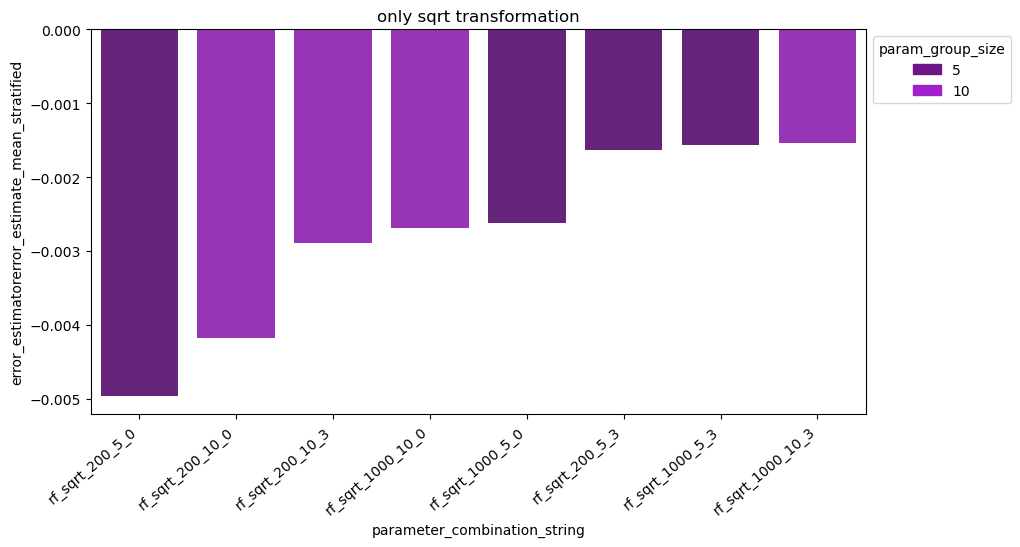

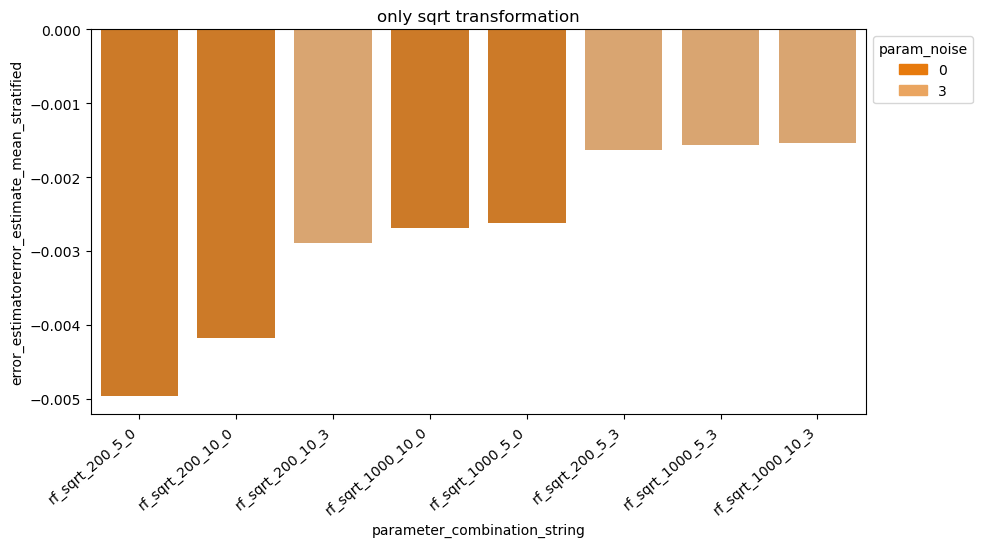

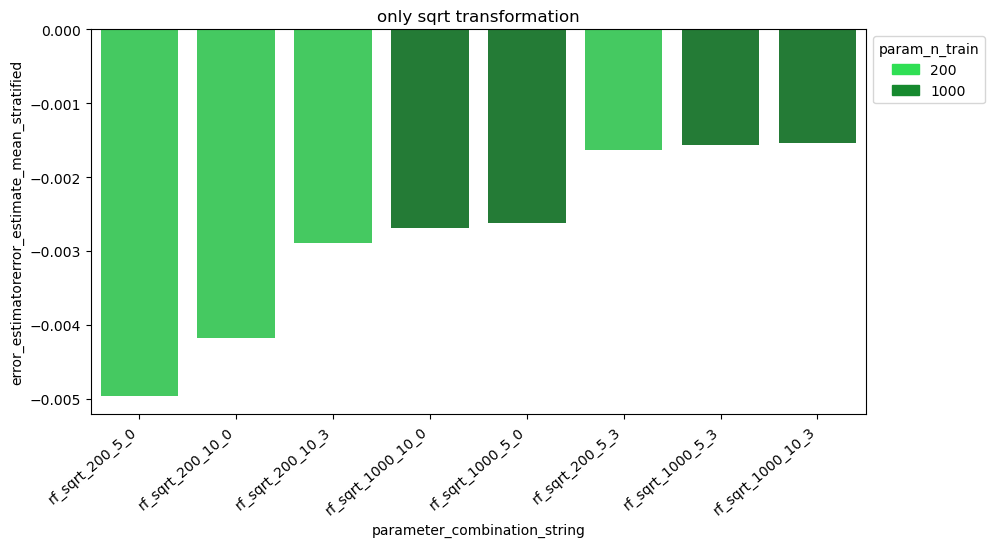

In [ ]:
experimental_parameters = ['param_group_size', 'param_noise', 'param_n_train']
df_transfromation= df[df['param_transformation'] == 'sqrt']

for experimental_parameter in experimental_parameters:
   barplot_coloured_by_parameter(data = df_transfromation, experimental_parameter = experimental_parameter, variable_y = 'error_estimatorerror_estimator_mean_diff', title = 'only sqrt transformation')

## error_estimatorerror_estimator_sd_stratified

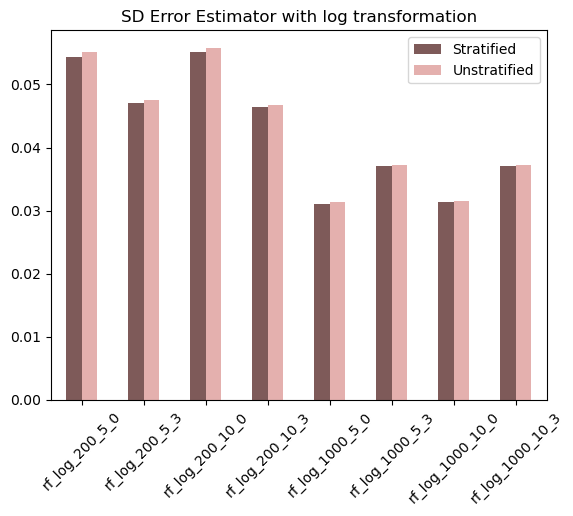

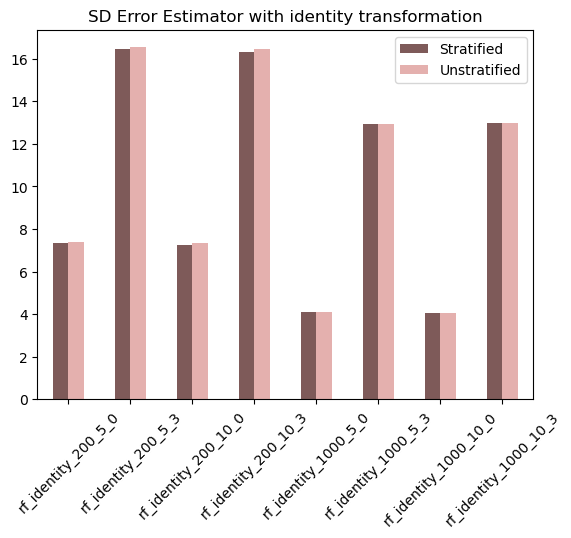

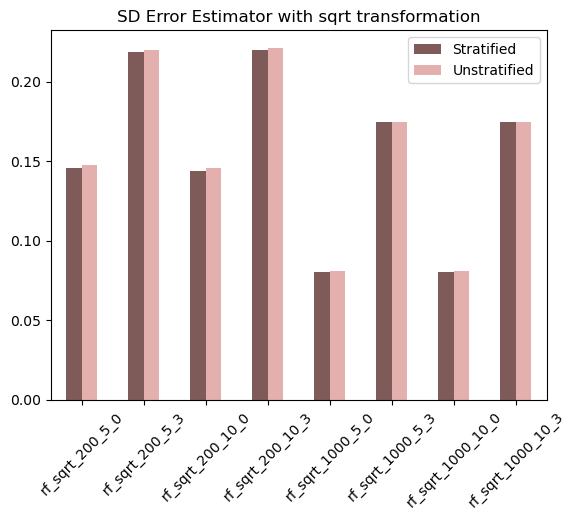

In [ ]:
experimental_parameters = ['param_group_size', 'param_noise', 'param_n_train']
for transformation in ['log', 'identity', 'sqrt']:
    df_transfromation = df[df['param_transformation'] == transformation]

    df_plot = pd.DataFrame({'Stratified': df_transfromation['error_estimatorerror_estimator_sd_stratified'].values,
                            'Unstratified': df_transfromation['error_estimatorerror_estimator_sd_unstratified'].values},
                           index=df_transfromation['parameter_combination_string'].values)
    ax = df_plot.plot.bar(rot=0, color={"Stratified": '#7E5A59', "Unstratified": '#E4B0AE'})
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_title(f'SD Error Estimator with {transformation} transformation')


## RandomSearch_Mean_Val_MSE_stratified

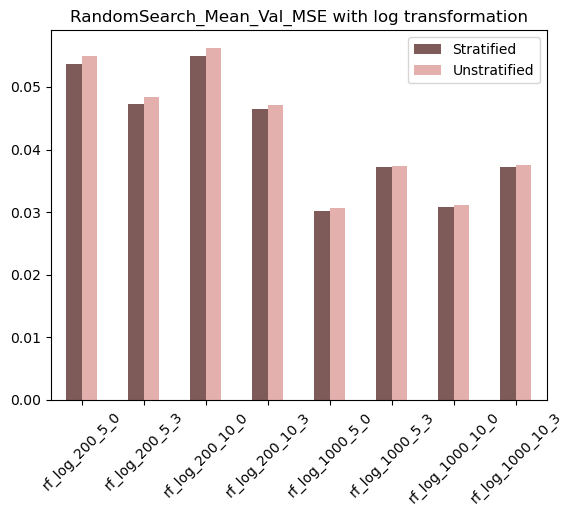

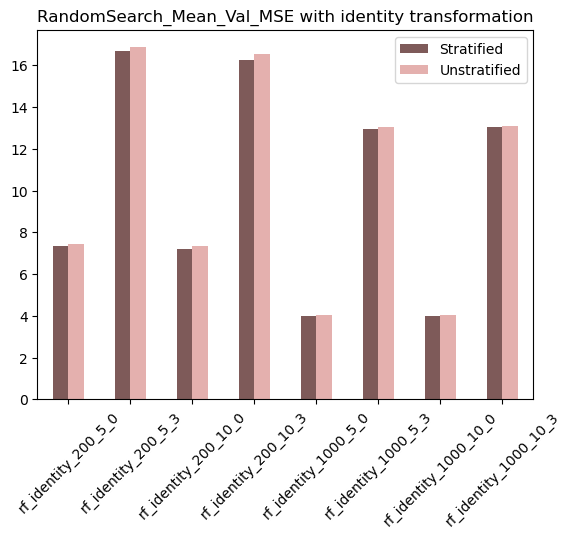

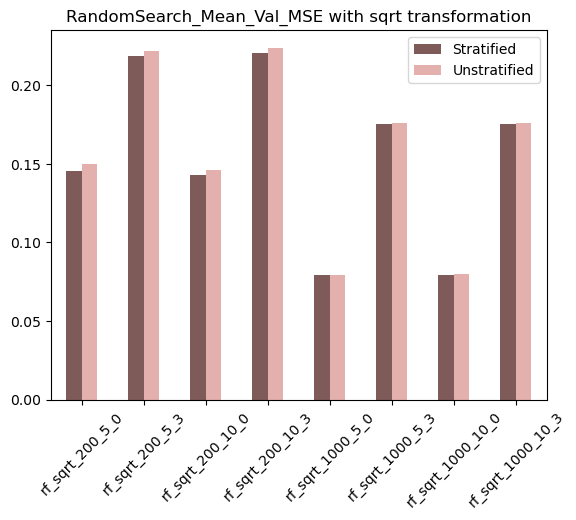

In [ ]:
experimental_parameters = ['param_group_size', 'param_noise', 'param_n_train']
for transformation in ['log', 'identity', 'sqrt']:
    df_transfromation = df[df['param_transformation'] == transformation]

    df_plot = pd.DataFrame({'Stratified': df_transfromation['RandomSearch_Mean_Val_MSE_stratified'].values,
                            'Unstratified': df_transfromation['RandomSearch_Mean_Val_MSE_unstratified'].values},
                           index=df_transfromation['parameter_combination_string'].values)
    ax = df_plot.plot.bar(rot=0, color={"Stratified": '#7E5A59', "Unstratified": '#E4B0AE'})
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_title(f'RandomSearch_Mean_Val_MSE with {transformation} transformation')
